<a href="https://colab.research.google.com/github/ameyvadnere/Mathematics-for-Data-Science-Prog-Assn-2/blob/main/Group_10_Prog_Assn_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# We will import all the necessary libraries first

import cvxpy as cp  # This is our convex optimization problem solver
import numpy as np  # For numerical computations
from skimage import io  # For reading, viewing and saving images
import os  # For accessing system directories and files
import matplotlib.pyplot as plt  # For displaying images
import seaborn as sns  # For data visualization

In [2]:
# The directory where our data is stored and want to save the results

FOLDER_PATH = '/content/drive/MyDrive/Group10 Vadnere Ameya Bramhanand and Kolluru Mohan Sai Krishna Prasada Rao'
os.chdir(FOLDER_PATH)  # Change the directory
os.getcwd()  # Verify the present working directory

'/content/drive/.shortcut-targets-by-id/764/Group10 Vadnere Ameya Bramhanand and Kolluru Mohan Sai Krishna Prasada Rao'

Original Corrupted Array: 
 [[215 215 215 ... 215 209 215]
 [215 207 215 ... 215 215 215]
 [215 215 215 ... 215 207 215]
 ...
 [215 215 215 ... 209 215 215]
 [215 215 215 ... 215 207 215]
 [209 215 209 ... 215 209 215]]


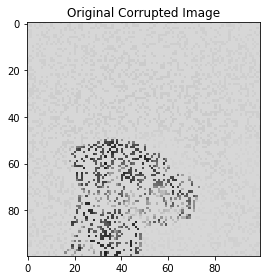

In [3]:
# We'll now see how our corrupted image looks like.

orig_corrupted_image = io.imread('incomplete.png', pilmode='L')  # pilmode='L' corresponds to single channel image (grayscale)

print("Original Corrupted Array: \n", orig_corrupted_image)

plt.title('Original Corrupted Image')
io.imshow(orig_corrupted_image)
plt.show()

In [4]:
# We'll now read the small sample of the signal that is extracted from the original image, i.e, the vector y (3000 x 1)

y = np.load('y.npy').squeeze()
q = y.shape[0]
print(q)
print(y)

3000
[242 248 245 ... 247 247 112]


In [5]:
# Reading the matrix C (3000 x 10000)

C = np.load('C.npy').squeeze()
print(C.shape)
C

(3000, 10000)


array([[ 0.009995,  0.00849 , -0.003944, ..., -0.00703 , -0.0191  ,
        -0.0159  ],
       [ 0.009995,  0.0141  ,  0.01396 , ..., -0.003248, -0.002176,
        -0.001091],
       [ 0.009995,  0.004158, -0.01169 , ..., -0.01045 ,  0.00939 ,
         0.01598 ],
       ...,
       [ 0.009995,  0.01182 ,  0.005615, ...,  0.011826,  0.01102 ,
         0.00659 ],
       [ 0.009995,  0.008125, -0.00479 , ...,  0.00171 ,  0.006096,
         0.005302],
       [ 0.009995, -0.00458 , -0.01117 , ..., -0.01049 , -0.01171 ,
         0.01808 ]], dtype=float16)

In [6]:
# Now, we read A_inv (10000, 10000), which will be used to reconstruct x (our original image)

%%time
A_inv = np.load('A_inv.npy').squeeze()
n = A_inv.shape[0]
print(n)

10000
CPU times: user 0 ns, sys: 126 ms, total: 126 ms
Wall time: 3.38 s


In [ ]:
# We now solve the convex optimization problem

%%time

s = cp.Variable(n)  # s is an (n, ) sparse vector
obj = cp.Minimize(cp.norm(s,1))  # l1 norm of s should be minimized
constraints = [y == C@s]  # Affine constraint
prob = cp.Problem(obj, constraints)  # Formulate the problem

prob.solve(verbose=True) # Solve the problem

print("status: {}".format(prob.status))



ECOS 2.0.7 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  -3.919e-22  -0.000e+00  +7e+07  1e+00  1e-02  1e+00  3e+03    ---    ---    1  1  - |  -  - 
 1  +2.380e+04  +2.404e+04  +3e+07  1e+00  6e-03  2e+02  2e+03  0.5742  1e-01   1  1  1 |  0  0
 2  +2.984e+04  +3.013e+04  +6e+06  7e-01  1e-03  3e+02  3e+02  0.9890  2e-01   2  0  0 |  0  0
 3  +4.722e+04  +4.735e+04  +3e+06  4e-01  5e-04  1e+02  1e+02  0.5795  4e-02   1  0  0 |  0  0
 4  +6.709e+04  +6.714e+04  +1e+06  2e-01  2e-04  5e+01  6e+01  0.6529  9e-02   1  0  0 |  0  0
 5  +9.070e+04  +9.072e+04  +5e+05  9e-02  8e-05  2e+01  3e+01  0.5803  5e-02   1  0  0 |  0  0
 6  +1.137e+05  +1.137e+05  +2e+05  4e-02  3e-05  1e+01  1e+01  0.6749  1e-01   1  0  0 |  0  0
 7  +1.278e+05  +1.278e+05  +8e+04  1e-02  1e-05  4e+00  4e+00  0.6496  8e-02   1  0  1 |  0  0
 8  +1.331e+05  +1.331e+05  +4e+04  7e-03  7e-

In [ ]:
# We save the sparse matrix s for further use without having to recalculate.

np.save('/content/drive/MyDrive/s_val_given.npy', s.value)

In [7]:
# Load s vector

s_val = np.load('/content/drive/MyDrive/s_val_given.npy')

In [9]:
# We will now reconstruct x.

x = A_inv @ s_val

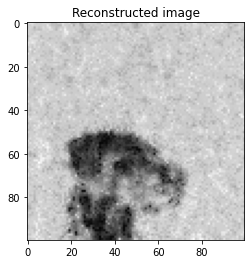

In [11]:
# The final reconstructed image would look like this:

fi = x.reshape(100,100).T
plt.title('Reconstructed image')
plt.imshow(fi, cmap='gray')